In [9]:
import pandas as pd
import warnings 
warnings.filterwarnings("ignore")
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style='white',color_codes=True)

In [2]:
df=pd.read_csv("Iris.csv")
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
df['Species'].value_counts()

Iris-virginica     50
Iris-setosa        50
Iris-versicolor    50
Name: Species, dtype: int64

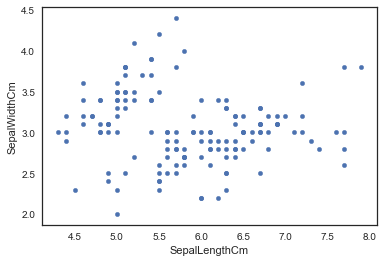

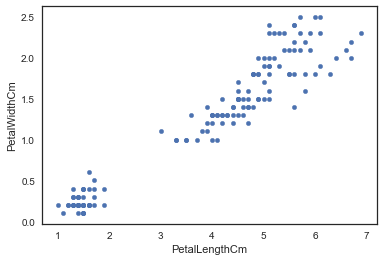

In [4]:
df.plot(kind='scatter',x="SepalLengthCm", y="SepalWidthCm")
df.plot(kind='scatter',x="PetalLengthCm", y="PetalWidthCm")

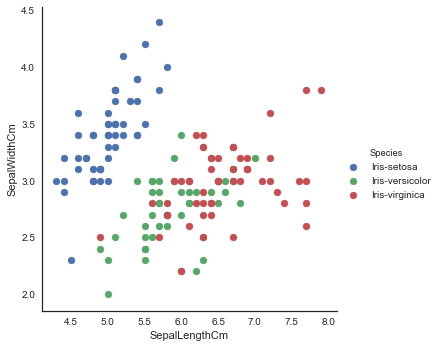

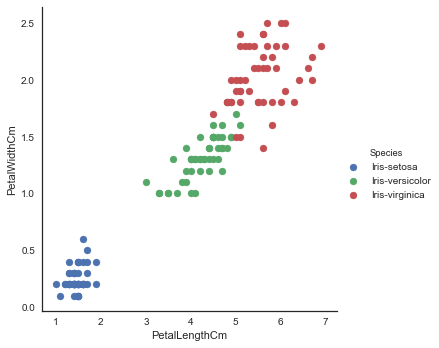

In [13]:
sns.FacetGrid(df, size=5,hue="Species").map(plt.scatter,"SepalLengthCm","SepalWidthCm").add_legend()
sns.FacetGrid(df, size=5,hue="Species").map(plt.scatter,"PetalLengthCm","PetalWidthCm").add_legend()

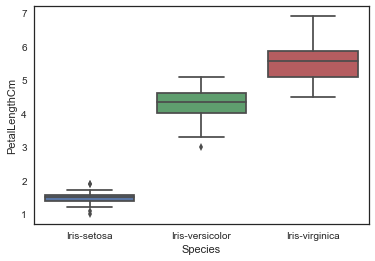

In [19]:
sns.boxplot(x="Species", y="PetalLengthCm", data=df)

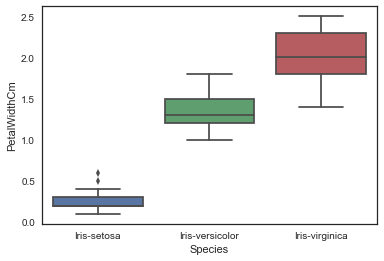

In [20]:
sns.boxplot(x="Species", y="PetalWidthCm", data=df)

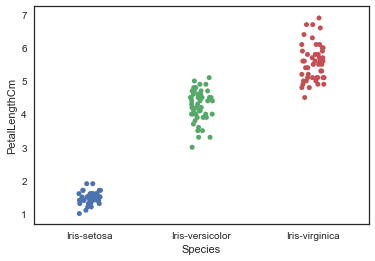

In [23]:
# Jitter is true so the points don't fall in a straight line
sns.stripplot(x="Species", y="PetalLengthCm", data=df, jitter=True, edgecolor="gray")

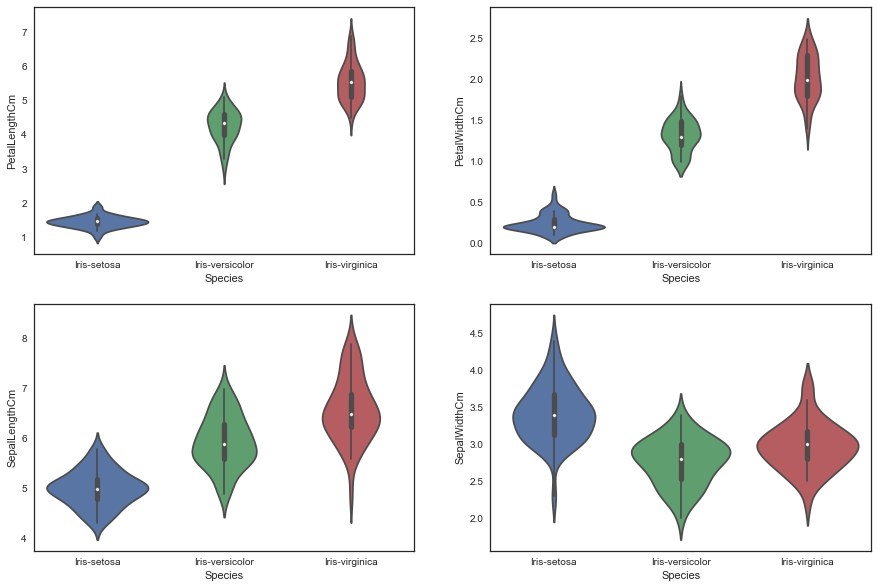

In [31]:
# Violin plots are sexy 
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.violinplot(x='Species',y='PetalLengthCm',data=df)
plt.subplot(2,2,2)
sns.violinplot(x='Species',y='PetalWidthCm',data=df)
plt.subplot(2,2,3)
sns.violinplot(x='Species',y='SepalLengthCm',data=df)
plt.subplot(2,2,4)
sns.violinplot(x='Species',y='SepalWidthCm',data=df)

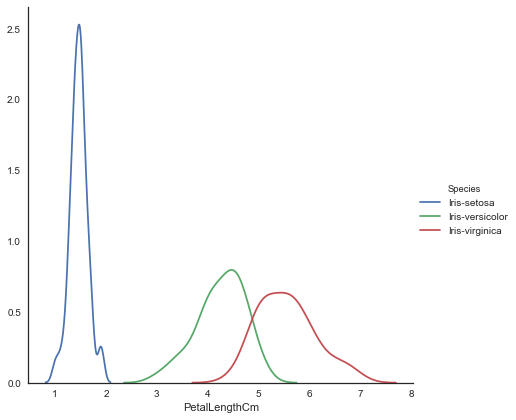

In [27]:
# Distribution density plot KDE (kernel density estimate)
sns.FacetGrid(df, hue="Species", size=6) \
   .map(sns.kdeplot, "PetalLengthCm") \
   .add_legend()

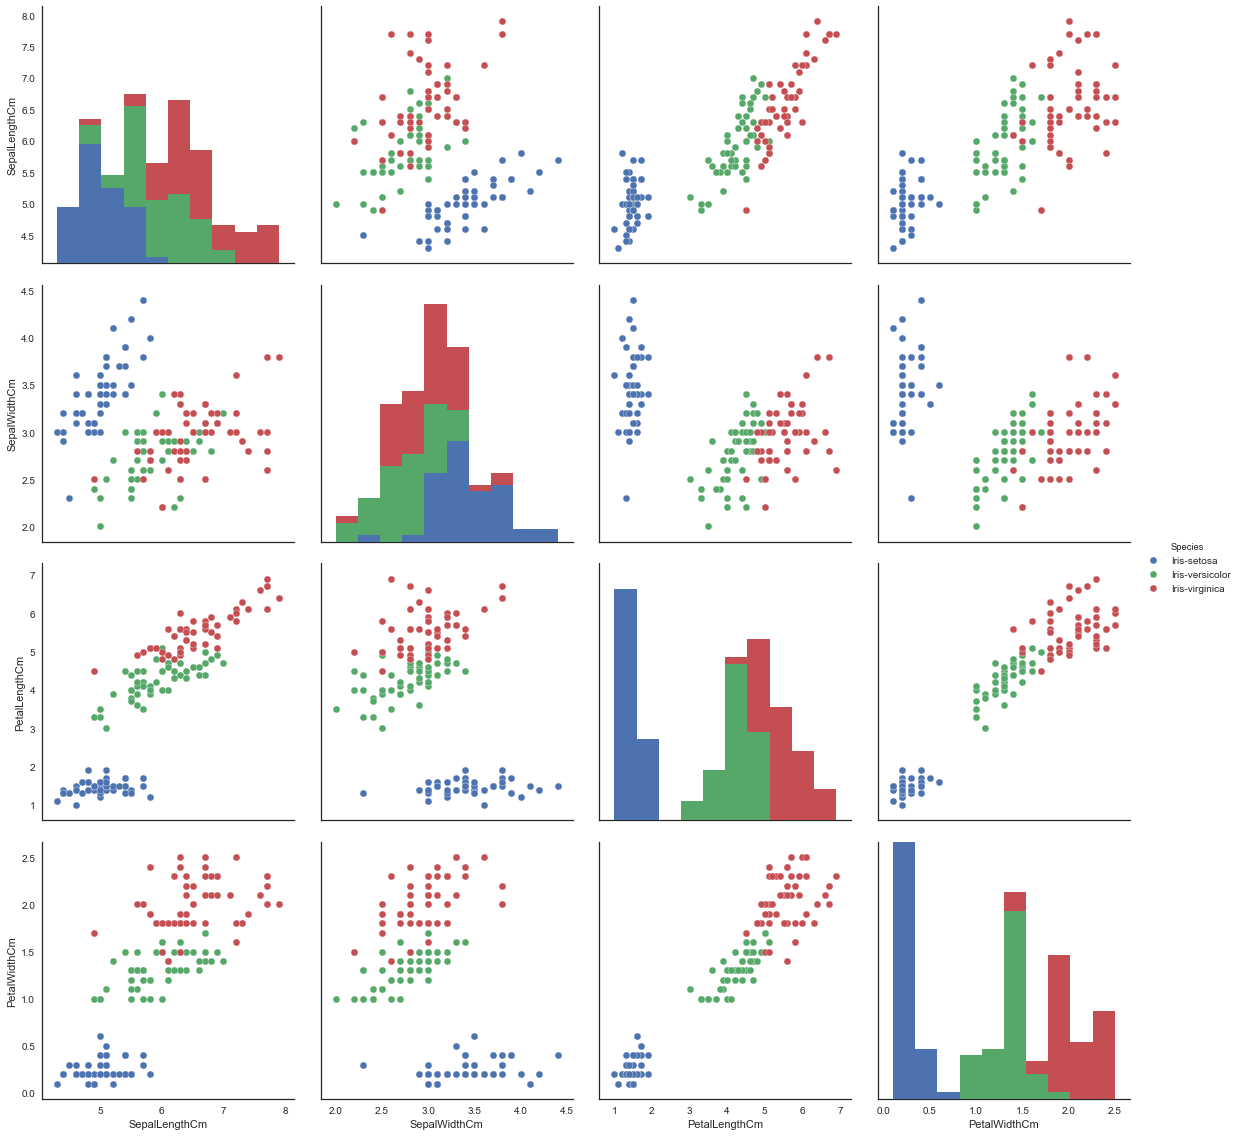

In [30]:
# Plots bivariate relation between each pair of features
sns.pairplot(df.drop("Id", axis=1), hue="Species", size=4)

In [34]:
import numpy as np
from sklearn.linear_model import LogisticRegression  
from sklearn.cross_validation import train_test_split
from sklearn.neighbors import KNeighborsClassifier  
from sklearn import svm 
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier

C:\Everything\Software\Python\Anaconda\Files\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [37]:
df.drop('Id',axis=1,inplace=True)
train, test = train_test_split(df, test_size = 0.3)
print(train.shape)
print(test.shape)

(105, 5)
(45, 5)


In [38]:
train_X=train[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']]
train_y=train.Species
test_X=test[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']]
test_y=test.Species

In [39]:
train_X.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
6,4.6,3.4,1.4,0.3
93,5.0,2.3,3.3,1.0
116,6.5,3.0,5.5,1.8
144,6.7,3.3,5.7,2.5
47,4.6,3.2,1.4,0.2


In [1]:
model = LogisticRegression()
model.fit(train_X,train_y)
prediction=model.predict(test_X)
print('The accuracy of the Logistic Regression is',metrics.accuracy_score(prediction,test_y)*100 ,'percent')

NameError: name 'LogisticRegression' is not defined

In [ ]:
model=KNeighborsClassifier(n_neighbors=3) 
model.fit(train_X,train_y)
prediction=model.predict(test_X)
print('The accuracy of the KNN is',metrics.accuracy_score(prediction,test_y)*100, 'percent')